In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate


plt.rcParams.update(
    {
        "mathtext.fontset": "cm",
        "font.family": "STIXGeneral",
        "legend.fontsize": 16,  # this is the font size in legends
        "xtick.labelsize": 16,  # this and next are the font of ticks
        "ytick.labelsize": 16,
        "axes.titlesize": 16,
        "axes.labelsize": 20,  # this is the foflags.N of axes labels
        "savefig.format": "pdf",  # how figures should be saved
        "legend.edgecolor": "0.0",
        "legend.framealpha": 0.0,
        # "text.usetex": True,
    }
)

plasmamap = plt.get_cmap("plasma")
RdBumap = plt.get_cmap("RdBu")

## Figure 2A

In [2]:
data = np.load("fig2a_data.npz", allow_pickle=True)

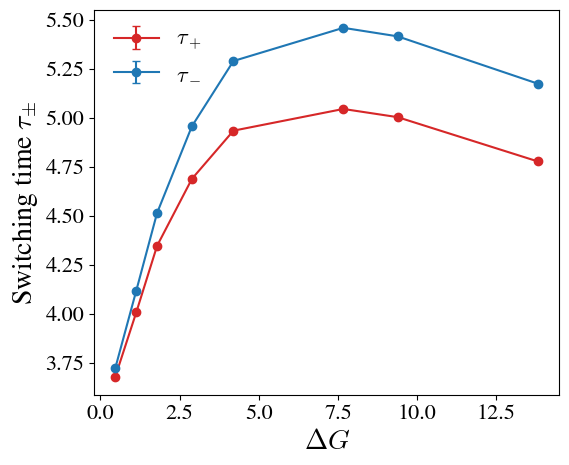

In [3]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.errorbar(
    data["DeltaG"],
    data["t_switching_mean"][0],
    yerr=data["t_switching_std"][0],
    fmt="o-",
    label=r"$\tau_+$",
    capsize=3,
    color="tab:red",
)
ax.errorbar(
    data["DeltaG"],
    data["t_switching_mean"][1],
    yerr=data["t_switching_std"][1],
    fmt="o-",
    label=r"$\tau_-$",
    capsize=3,
    color="tab:blue",
)

ax.set_xlabel(r"$\Delta G$")
ax.set_ylabel(r"Switching time $\tau_{\pm}$")
ax.legend()

Text(0, 0.5, '$(\\tau_--\\tau_+)/\\langle \\tau\\rangle$')

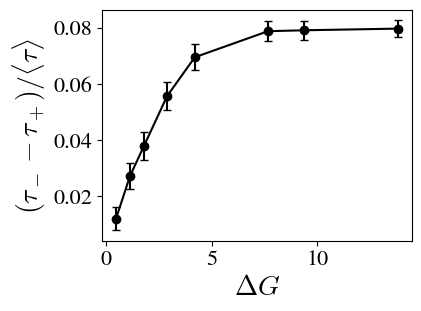

In [4]:
## switching time
fig, ax = plt.subplots(figsize=(4, 3))
ax.errorbar(
    data["DeltaG"],
    data["t_switching_asymmetry"],
    yerr=data["t_switching_asymmetry_std"],
    fmt="o-",
    capsize=3,
    color="k",
)
ax.set_xlabel(r"$\Delta G$")
# ax.set_ylabel(r"Relative asymmetry")
ax.set_ylabel(r"$(\tau_--\tau_+)/\langle \tau\rangle$")
# ax.legend()

## Figure 2B

In [5]:
data = np.load("fig2b_data.npz", allow_pickle=True)

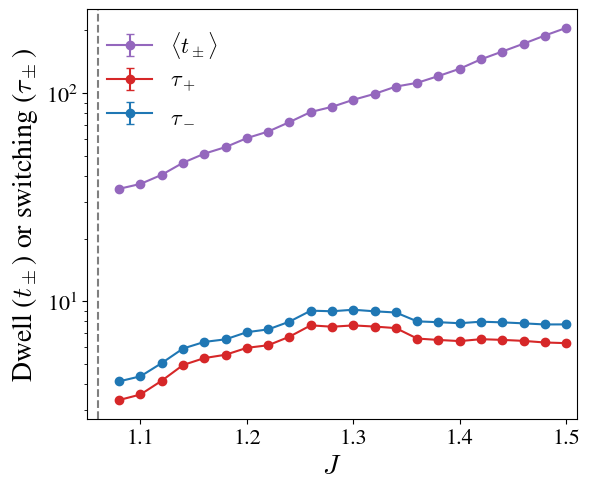

In [6]:
## switching time
fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
ax.errorbar(
    data["J"],
    data["t_dwell_mean"],
    yerr=data["t_dwell_std"],
    fmt="o-",
    label=r"$\langle t_\pm \rangle$",
    capsize=3,
    color="tab:purple",
)

ax.errorbar(
    data["J"],
    data["t_switching_mean"][0],
    yerr=data["t_switching_std"][0],
    fmt="o-",
    label=r"$\tau_+$",
    capsize=3,
    color="tab:red",
)
ax.errorbar(
    data["J"],
    data["t_switching_mean"][1],
    yerr=data["t_switching_std"][1],
    fmt="o-",
    label=r"$\tau_-$",
    capsize=3,
    color="tab:blue",
)

ax.axvline(data["Jc"], color="k", linestyle="--", alpha=0.5)
ax.set_xlim(data["Jc"] - 0.01, data["J"][-1] + 0.01)

ax.set_xlabel(r"$J$")
ax.set_ylabel(r"Dwell ($t_\pm$) or switching ($\tau_\pm$)")
ax.legend()
ax.set_yscale("log")

Text(0, 0.5, '$\\langle \\tau_\\pm \\rangle / \\langle t_\\pm\\rangle$')

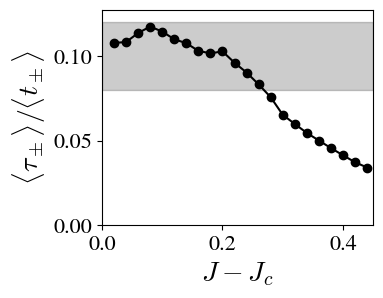

In [7]:
fig, ax = plt.subplots(figsize=(3.5, 2.8))
ax.errorbar(
    data["J"] - data["Jc"],
    data["switching_dwell_ratio"],
    yerr=data["switching_dwell_ratio_std"],
    fmt="o-",
    capsize=3,
    color="k",
)

ax.axhspan(0.08, 0.12, color="k", alpha=0.2)

ax.set_xlim(0, data["J"][-1] - data["Jc"] + 0.01)
ax.set_ylim(0, data["switching_dwell_ratio"].max() + 0.01)
ax.set_xlabel(r"$J-J_c$")
ax.set_ylabel(r"$\langle \tau_\pm \rangle / \langle t_\pm\rangle$")

## Figure 2CD

In [10]:
data = np.load("fig2cd_data.npz", allow_pickle=True)

J_list = data["J_list"]
epsilon_list = data["epsilon_list"]
switching_time_asym = data["switching_time_asym"]
switching_dwell_ratio = data["switching_dwell_ratio"]

In [22]:
epsilon_edge_interp = np.linspace(epsilon_list[0], epsilon_list[-1], 50)
J_edge_interp = np.linspace(J_list[0], J_list[-1], 50)
JJ, ee = np.meshgrid(J_edge_interp, epsilon_edge_interp, indexing="ij")

interp = interpolate.RegularGridInterpolator(
    (J_list, epsilon_list),
    np.where(~np.isnan(switching_time_asym), switching_time_asym, 1),
    method="slinear",
    bounds_error=False,
    fill_value=None,
)
switching_time_asym_interp = interp((JJ, ee))


interp = interpolate.RegularGridInterpolator(
    (J_list, epsilon_list),
    np.where(~np.isnan(switching_dwell_ratio), switching_dwell_ratio, 0.1),
    method="slinear",
    bounds_error=False,
    fill_value=None,
)
switching_dwell_ratio_interp = interp((JJ, ee))

switching_time_asym_contours = [0.06, 0.12, 0.18]
switching_dwell_ratio_contours = [0.05, 0.1]
contour_colors = ["black", "white"]

/var/folders/mq/p5kn27bn3j927psc4z_49npm0000gn/T/ipykernel_4644/4205568688.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(["${:.0f}\\%$".format(x * 100) for x in cbar.get_ticks()])


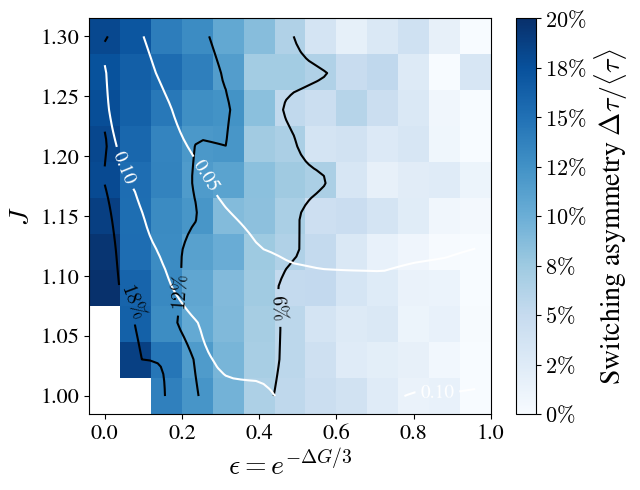

In [24]:
fig, ax = plt.subplots(figsize=(6.5, 5), tight_layout=True)
extent = [
    epsilon_list[0] - (epsilon_list[1] - epsilon_list[0]) / 2,
    epsilon_list[-1] + (epsilon_list[1] - epsilon_list[0]) / 2,
    J_list[0] - (J_list[1] - J_list[0]) / 2,
    J_list[-1] + (J_list[1] - J_list[0]) / 2,
]

c = ax.imshow(
    switching_time_asym,
    cmap="Blues",
    origin="lower",
    extent=extent,
    aspect="auto",
    vmin=0,
    vmax=0.2,
)


cbar = fig.colorbar(c, ax=ax)
cbar.ax.set_yticklabels(["${:.0f}\\%$".format(x * 100) for x in cbar.get_ticks()])
cbar.set_label(r"Switching asymmetry $\Delta \tau/\langle\tau\rangle$")

ax.set_xlabel(r"$\epsilon=e^{-\Delta G/3}$")
ax.set_ylabel(r"$J$")

## add contours
c_20 = ax.contour(
    epsilon_edge_interp,
    J_edge_interp,
    switching_time_asym_interp,
    switching_time_asym_contours,
    colors=contour_colors[0],
)
c_20_labels = ax.clabel(
    c_20,
    inline=True,
    fontsize=14,
    colors=contour_colors[0],
    fmt=lambda x: f"${x*100:.0f}\\%$",
)
c_10 = ax.contour(
    epsilon_edge_interp,
    J_edge_interp,
    switching_dwell_ratio_interp,
    switching_dwell_ratio_contours,
    colors=contour_colors[1],
)
c_10_labels = ax.clabel(c_10, inline=True, fontsize=14, colors=contour_colors[1])

<a list of 3 text.Text objects>

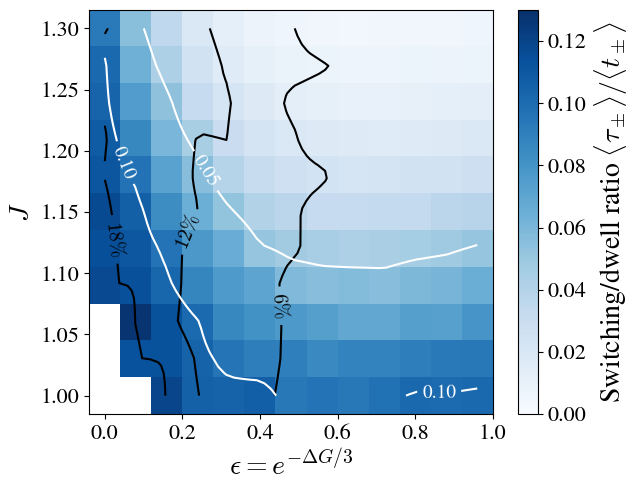

In [26]:
fig, ax = plt.subplots(figsize=(6.5, 5), tight_layout=True)
extent = [
    epsilon_list[0] - (epsilon_list[1] - epsilon_list[0]) / 2,
    epsilon_list[-1] + (epsilon_list[1] - epsilon_list[0]) / 2,
    J_list[0] - (J_list[1] - J_list[0]) / 2,
    J_list[-1] + (J_list[1] - J_list[0]) / 2,
]
c = ax.imshow(
    switching_dwell_ratio,
    cmap="Blues",
    origin="lower",
    extent=extent,
    aspect="auto",
    vmin=0,
    vmax=np.round(np.nanmax(switching_dwell_ratio) * 100) / 100,
)

cbar = fig.colorbar(c, ax=ax)
cbar.set_label(
    r"Switching/dwell ratio $\langle \tau_\pm \rangle / \langle t_\pm\rangle$"
)

ax.set_xlabel(r"$\epsilon=e^{-\Delta G/3}$")
ax.set_ylabel(r"$J$")

## add contours
c_20_label_positions = np.array([c_20_labels[i].get_position() for i in range(3)])
c_20_label_positions[1] = c_20_label_positions[1] + np.array([0.0, 0.05])
c_20_label_positions[2] = c_20_label_positions[2] + np.array([0.0, 0.05])

c_20 = ax.contour(
    epsilon_edge_interp,
    J_edge_interp,
    switching_time_asym_interp,
    switching_time_asym_contours,
    colors=contour_colors[0],
)
ax.clabel(
    c_20,
    inline=True,
    fontsize=14,
    colors=contour_colors[0],
    fmt=lambda x: f"${x*100:.0f}\\%$",
    manual=c_20_label_positions,
)
c_10 = ax.contour(
    epsilon_edge_interp,
    J_edge_interp,
    switching_dwell_ratio_interp,
    switching_dwell_ratio_contours,
    colors=contour_colors[1],
)
ax.clabel(c_10, inline=True, fontsize=14, colors=contour_colors[1])

## Figure 2EF

In [27]:
data = np.load("fig2ef_data.npz", allow_pickle=True)

/Users/qiweiyu/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/qiweiyu/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


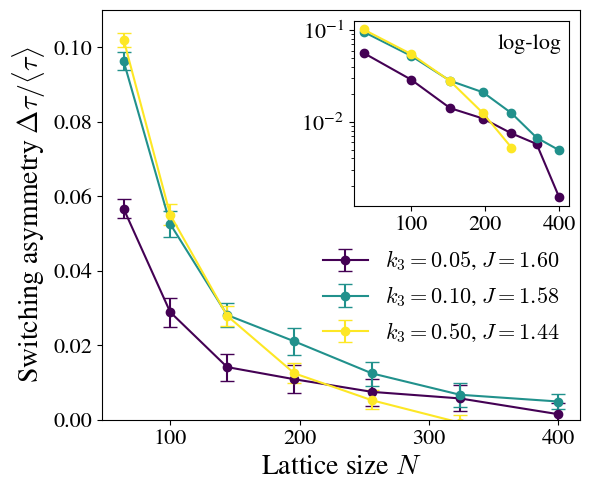

In [31]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import ScalarFormatter

virimap = plt.get_cmap("viridis")

fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
for _ in range(len(data["J"])):
    J, k3 = data["J"][_], data["k3"][_]
    ax.errorbar(
        data["N"][_] ** 2,
        data["rel_diff"][_],
        yerr=data["rel_diff_std"][_],
        capsize=5,
        fmt="o-",
        label=f"$k_3 = {k3:.2f}$, " + f"$J = {J:.2f}$",
        color=virimap(_ / (len(data["k3"]) - 1)),
    )

ax.set_xlabel(r"Lattice size $N$")
ax.set_ylabel(r"Switching asymmetry $\Delta \tau/\langle\tau\rangle$")
ax.set_ylim(0, 0.11)

axin = inset_axes(ax, width="45%", height="45%", loc="upper right")
for _ in range(len(data["J"])):
    plot_mask = data["rel_diff"][_] > 0
    J, k3 = data["J"][_], data["k3"][_]
    axin.plot(
        data["N"][_][plot_mask] ** 2,
        data["rel_diff"][_][plot_mask],
        "o-",
        label=f"$k_3 = {k3:.2f}$, " + f"$J = {J:.2f}$",
        color=virimap(_ / (len(data["k3"]) - 1)),
    )
axin.set_xscale("log")
axin.set_yscale("log")

axin.set_xticks([])
axin.set_xticks(100 * 2 ** np.arange(3))
axin.set_xticklabels(100 * 2 ** np.arange(3))
# get rid of minor ticks
axin.xaxis.set_minor_locator(plt.NullLocator())
# axin.text(0.45, 0.85, "log-log scale", transform=axin.transAxes, fontsize=16)
axin.text(0.67, 0.85, "log-log", transform=axin.transAxes, fontsize=16)

ax.legend(frameon=False, loc="center right", bbox_to_anchor=(1.0, 0.3))

Text(0, 0.5, 'Switching/dwell ratio $\\langle \\tau_\\pm \\rangle / \\langle t_\\pm\\rangle$')

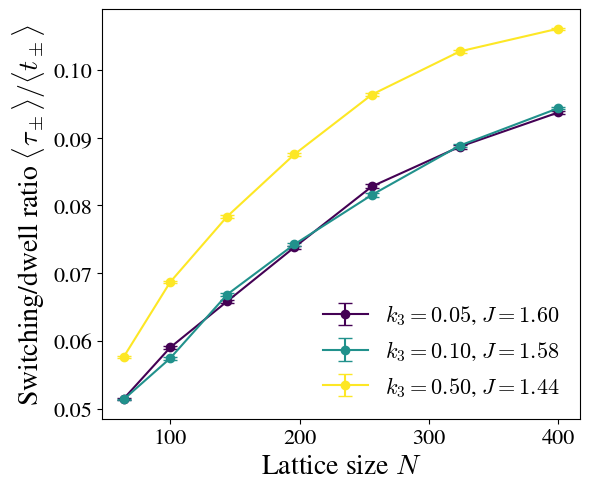

In [33]:
fig, ax = plt.subplots(figsize=(6, 5), tight_layout=True)
for _ in range(len(data["J"])):
    J, k3 = data["J"][_], data["k3"][_]
    ax.errorbar(
        data["N"][_] ** 2,
        data["t_ratio"][_],
        yerr=data["t_ratio_std"][_],
        capsize=5,
        fmt="o-",
        label=f"$k_3 = {k3:.2f}$, " + f"$J = {J:.2f}$",
        color=virimap(_ / (len(data["k3"]) - 1)),
    )
ax.set_xlabel(r"Lattice size $N$")
# ax.set_xticks(N_list)
ax.legend(frameon=False)
ax.set_ylabel(
    r"Switching/dwell ratio $\langle \tau_\pm \rangle / \langle t_\pm\rangle$"
)